In [32]:
import pandas as pd
import numpy as np

In [8]:
local_file_path = ".data/blob/main/Booli_sold.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv"
df = pd.read_csv(url)
df.head(20)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2500000,2979.0,50.0,2.5,2015-03-20 17:38:11,1935.0,Lägenhet,1836707,2015-04-07,3230000,...,59.371644,18.053235,True,Stockholm,Stockholms län,225,Notar,1566,Broker,http://www.notar.se/
96,2695000,NaN,59.0,2.0,2015-03-12 17:26:00,1935.0,Lägenhet,1831135,2015-03-25,2850000,...,59.371828,18.052554,True,Stockholm,Stockholms län,225,Svensk Fastighetsförmedling,713,Broker,http://www.svenskfast.se/
97,2650000,2542.0,54.0,2.0,2015-03-05 18:16:29,1935.0,Lägenhet,1826641,2015-03-18,2975000,...,59.371828,18.052554,True,Stockholm,Stockholms län,225,Fastighetsbyrån,1573,Broker,http://www.fastighetsbyran.se/
98,1995000,1773.0,36.0,1.0,2015-02-27 18:56:04,1968.0,Lägenhet,1820445,2015-03-18,2410000,...,59.370950,18.058625,True,Stockholm,Stockholms län,264,Notar,1566,Broker,http://www.notar.se/


In [9]:
#new dataset with relevant data for this homework
clean_data = df[["listPrice","livingArea","location.address.streetAddress"]]
clean_data

,listPrice,livingArea,location.address.streetAddress
0,3995000,73.0,Åminnevägen 19
1,1995000,36.0,Docentbacken 9
2,5100000,81.0,Ekhagsvägen 5
3,5495000,107.0,Torphagsvägen 4
4,1995000,29.0,Torphagsvägen 14
...,...,...,...
153,1495000,26.0,Ekhagsvägen 12
154,2245000,50.0,Ekhagsvägen 12
155,1450000,23.0,Åminnevägen 17
156,2495000,56.0,Torphagsvägen 18


In [10]:
#Calculation of ppsqm
ppsqm = clean_data["listPrice"]/clean_data["livingArea"]
ppsqm

0      54726.027397
1      55416.666667
2      62962.962963
3      51355.140187
4      68793.103448
           ...     
153    57500.000000
154    44900.000000
155    63043.478261
156    44553.571429
157    46000.000000
Length: 158, dtype: float64

In [12]:
# table of the relevant data with ppsqm as a new column
df["ppsqm"] = ppsqm
new_data = df[["listPrice","livingArea","location.address.streetAddress","ppsqm"]]
new_data

,listPrice,livingArea,location.address.streetAddress,ppsqm
0,3995000,73.0,Åminnevägen 19,54726.027397
1,1995000,36.0,Docentbacken 9,55416.666667
2,5100000,81.0,Ekhagsvägen 5,62962.962963
3,5495000,107.0,Torphagsvägen 4,51355.140187
4,1995000,29.0,Torphagsvägen 14,68793.103448
...,...,...,...,...
153,1495000,26.0,Ekhagsvägen 12,57500.000000
154,2245000,50.0,Ekhagsvägen 12,44900.000000
155,1450000,23.0,Åminnevägen 17,63043.478261
156,2495000,56.0,Torphagsvägen 18,44553.571429


In [14]:
#sorting data so that the most expensive appartments are displayed in a descending order
sorted_data = new_data.sort_values("listPrice", ascending = False).head(20)
sorted_data

,listPrice,livingArea,location.address.streetAddress,ppsqm
59,8500000,152.0,Torphagsvägen 22,55921.052632
5,7495000,125.0,Torphagsvägen 4,59960.000000
31,7200000,104.0,Docentbacken 9,69230.769231
45,6995000,121.0,Torphagsvägen 10,57809.917355
40,6995000,114.0,Torphagsvägen 14,61359.649123
14,6650000,97.0,Ekhagsvägen 9,68556.701031
113,6500000,119.0,Torphagsvägen 6,54621.848739
68,6450000,138.0,Torphagsvägen 6,46739.130435
79,6000000,96.7,Docentbacken 3,62047.569804
32,5995000,97.0,Ekhagsvägen 9,61804.123711


In [26]:
# Filtering data for area ekhagen
ekhagen_data = new_data[new_data["location.address.streetAddress"].str.startswith("Ekhagsvägen")]
ekhagen_data

,listPrice,livingArea,location.address.streetAddress,ppsqm
2,5100000,81.0,Ekhagsvägen 5,62962.962963
10,2295000,29.0,Ekhagsvägen 9,79137.931034
11,2495000,47.0,Ekhagsvägen 12,53085.106383
14,6650000,97.0,Ekhagsvägen 9,68556.701031
15,2495000,44.0,Ekhagsvägen 12,56704.545455
18,4060000,71.0,Ekhagsvägen 12,57183.098592
22,3500000,59.0,Ekhagsvägen 4,59322.033898
23,2575000,39.0,Ekhagsvägen 4,66025.641026
25,2350000,37.0,Ekhagsvägen 8,63513.513514
28,4390000,76.0,Ekhagsvägen 8,57763.157895


In [38]:
# Calculating the average ppsqm in Ekhagen
avg_ppsqm = ekhagen_data["ppsqm"].mean()
print(avg_ppsqm)

54841.59105899805


In [ ]:
# An interesting observation from the data worth highlighting is that the appartments on Torphagsvägen seems to be the most expensive ones.


In [90]:
local_file_path = ".data/blob/main/2018_R_per_kommun.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv"
datafile = pd.read_csv(url, engine = 'python',sep = r';',decimal = ',')
datafile

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,25,80,Norrbottens län,Luleå,15.38,7.53,4.37,4.78,38.97,10.47,...,NaN,NaN,0.01,0.03,0.69,0.04,53182,53589,60185,89.04
286,25,81,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,...,NaN,NaN,0.00,0.03,0.61,0.02,29523,29719,33094,89.80
287,25,82,Norrbottens län,Boden,14.32,6.23,3.61,4.61,41.76,8.10,...,NaN,NaN,0.02,0.03,0.84,0.07,19110,19291,21934,87.95
288,25,83,Norrbottens län,Haparanda,12.79,9.61,1.86,5.32,36.69,5.91,...,NaN,NaN,NaN,0.04,1.01,0.11,4402,4454,6120,72.78


In [92]:
# Data for stockholms län
filtered_data = datafile[datafile["LÄNSNAMN"]  == "Stockholms län"]
filtered_data

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
5,1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,...,NaN,NaN,0.01,0.01,0.64,0.08,17814,17946,19472,92.16
6,1,26,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,...,NaN,NaN,0.01,0.04,0.58,0.07,61440,61869,72839,84.94
7,1,27,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,...,NaN,NaN,0.06,0.03,0.64,0.05,45393,45719,58436,78.24
8,1,28,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,...,NaN,NaN,NaN,0.04,0.75,0.02,9985,10066,11463,87.81
9,1,36,Stockholms län,Haninge,22.94,6.06,5.11,5.36,27.29,7.99,...,0.0,NaN,0.01,0.05,0.79,0.05,50484,50940,59890,85.06


In [97]:
# Calculation of giltliga röster
giltliga_röster = filtered_data["RÖSTER GILTIGA"].sum()
print(giltliga_röster)

1426237


In [99]:
#Sorted data for Socialdemokraterna with decending order of voting percentage
clean_data = datafile[["LÄNSNAMN","KOMMUNNAMN","S"]]
sorted_data = clean_data.sort_values("S", ascending = False)
sorted_data
#Munkfors is the answer

,LÄNSNAMN,KOMMUNNAMN,S
188,Värmlands län,Munkfors,52.18
286,Norrbottens län,Piteå,47.48
196,Värmlands län,Hagfors,47.46
279,Norrbottens län,Överkalix,46.68
280,Norrbottens län,Kalix,45.37
...,...,...,...
133,Hallands län,Kungsbacka,16.32
13,Stockholms län,Täby,13.99
21,Stockholms län,Lidingö,12.35
98,Skåne län,Vellinge,10.58


In [100]:
# Sorting all data with descending order of participation in municipialities
partic_sorted_data = datafile.sort_values("VALDELTAGANDE", ascending = False)
partic_sorted_data[["KOMMUNNAMN", "VALDELTAGANDE"]]
#The answer is Lomma, Habo and Vellinge

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13
22,Vaxholm,92.74
5,Ekerö,92.16
...,...,...
268,Sorsele,80.80
97,Burlöv,80.76
7,Botkyrka,78.24
17,Södertälje,77.54


In [103]:
import numpy as np
import matplotlib.pyplot as plt
local_file_path = ".data/blob/main/stroke-data.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv"
df = pd.read_csv(url)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<BarContainer object of 2 artists>

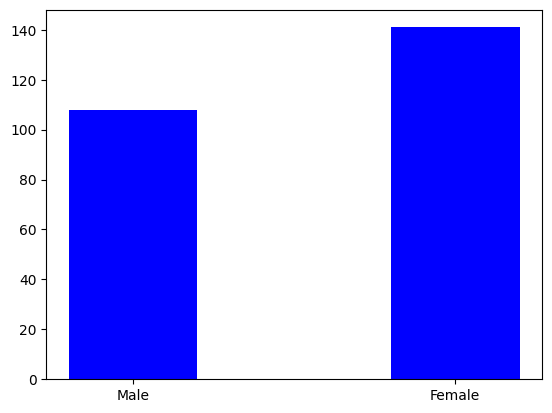

In [111]:
# Sorting the data into groups of male and female data and plotting the number of strokes for each group
male_data = df[df["gender"]=="Male"]
female_data = df[df["gender"]=="Female"]
strokes_male = male_data["stroke"].sum()
strokes_female=female_data["stroke"].sum()
xdata = ["Male","Female"]
ydata = [strokes_male,strokes_female]
plt.bar(xdata, ydata, color ='blue', 
        width = 0.4)
# The barplot indicates that strokes are somewhat more common for females given the data.